In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [9]:
app_data=pd.read_csv(r'application_train.csv')

In [11]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
pd.set_option('display.max_rows',200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [21]:
percentage = 47
threshold = (((100 - percentage) / 100) * app_data.shape[0] - 1)
app_df = app_data.dropna(axis=1, thresh=threshold) 
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
print(app_df.shape)

(307511, 73)


In [31]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [39]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [41]:
app_df.OCCUPATION_TYPE.fillna('Others',inplace=True)

In [43]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

In [45]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [49]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [51]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: proportion, Length: 814, dtype: float64

In [53]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

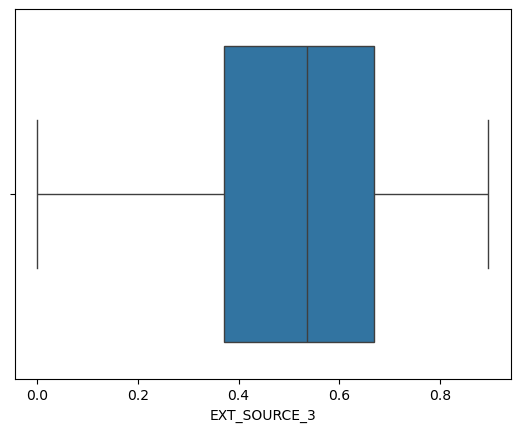

In [57]:
sns.boxplot(app_df.EXT_SOURCE_3,orient='h')
plt.show()

In [59]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [61]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [63]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: proportion, Length: 814, dtype: float64

In [65]:
null_cols=list(app_df.isna().any())
len(null_cols)

73

In [67]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [69]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [71]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [97]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [105]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [107]:
app_df.columns = app_df.columns.str.strip() 
for col in cols:
    app_df[col].fillna(app_df[col].mode()[0], inplace=True)


In [111]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [113]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [115]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [117]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: proportion, Length: 119831, dtype: float64

In [119]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

In [121]:
app_df.NAME_TYPE_SUITE.fillna(app_df[col].mode()[0], inplace=True)

In [123]:
app_df.CNT_FAM_MEMBERS.fillna(app_df[col].mode()[0], inplace=True)

In [125]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(),inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(),inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)


In [131]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [141]:
app_df['YEARS_BIRTH']=app_df.DAYS_BIRTH.apply(lambda x:int(x//356))
app_df['YEARS_EMPLOYED']=app_df.DAYS_EMPLOYED.apply(lambda x:int(x//356))
app_df['DAYS_REGISTRATION']=app_df.DAYS_REGISTRATION.apply(lambda x:int(x//356))
app_df['DAYS_ID_PUBLISH']=app_df.DAYS_ID_PUBLISH.apply(lambda x:int(x//356))
app_df['DAYS_LAST_PHONE_CHANGE']=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x:int(x//356))


In [143]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [145]:
app_df['AMT_CREDIT_Category']=pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                    labels=['very low credit','low credit','medium credit','high credit','very high credit'])

In [147]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
low credit          31.511770
medium credit       25.733324
high credit         16.791314
very low credit     14.035088
very high credit    11.928504
Name: proportion, dtype: float64

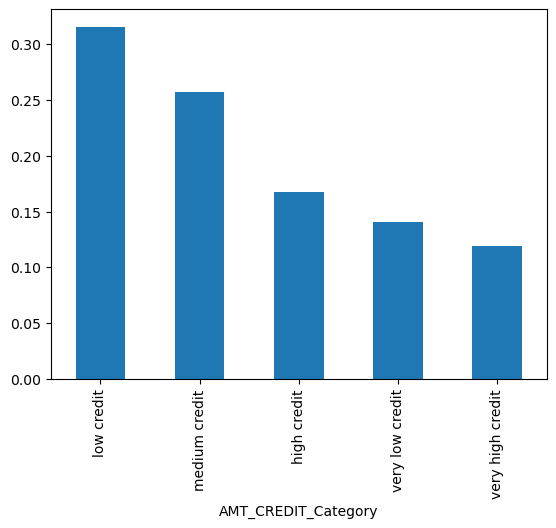

In [151]:
app_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.bar()
plt.show()

In [181]:
app_df['AGE_Category'] = pd.cut(app_df['YEARS_BIRTH'], 
                                bins=[0, 25, 45, 65, 85], 
                                labels=['below 25', '25-45', '45-65', '65-85'])

In [183]:
app_df.AGE_Category.value_counts(normalize=True)*100

AGE_Category
below 25   NaN
25-45      NaN
45-65      NaN
65-85      NaN
Name: proportion, dtype: float64

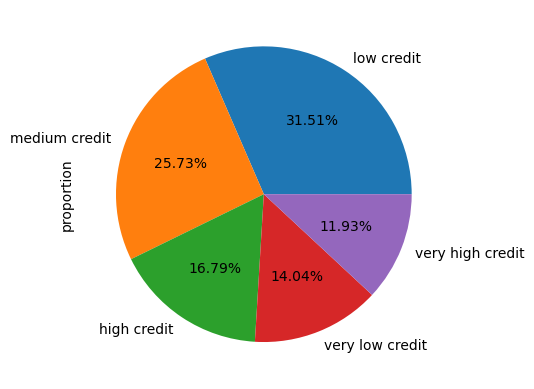

In [185]:
app_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

In [191]:
app_df = app_df.dropna(subset=['AGE_Category'])
app_df['AGE_Category'].fillna('Unknown', inplace=True)

TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first